# Load Data

In [1]:
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,sklearn -g

CPython 3.8.1
IPython 7.12.0

numpy 1.18.1
sklearn 0.22.1

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-28-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
Git hash   :


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=1000000, n_features=3, 
                  centers=3, cluster_std=0.9, random_state=80)

# Test Speed

In [5]:
[i for i in range(2, 11)]

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
def test_speed(x):
    """
    Just a convenient function to select the number of cluster groups based 
    on the elbow method. Requries testing 2 to 10 k ranges.
    """
    for i in range(2, 11):
        
        model = KMeans(n_clusters=i, init='k-means++', max_iter=300).fit(x)
        l, c, s = model.labels_, model.cluster_centers_, model.inertia_

In [7]:
%timeit test_speed(X)

1min 20s ± 5.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Final Output

In [8]:
num = []
ss = []

In [9]:
for i in range(2, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300).fit(X)
    
    num.append(i)
    ss.append(model.inertia_)

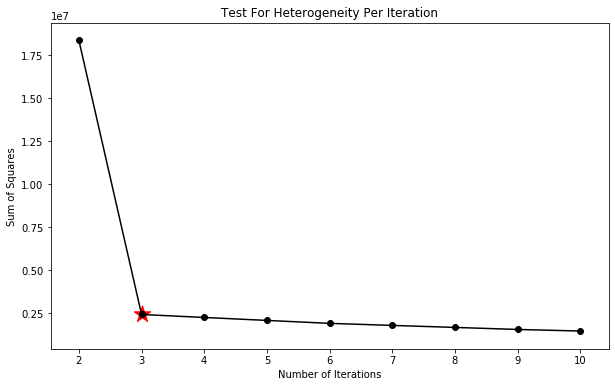

In [10]:
plt.figure(figsize=(10,6))
plt.plot(num, ss, c='black')
plt.scatter(num[1], ss[1], color='red', s=300, marker='*')
plt.scatter(num, ss, c='black')
plt.ylabel('Sum of Squares')
plt.xlabel('Number of Iterations')
plt.title('Test For Heterogeneity Per Iteration');